<a href="https://colab.research.google.com/github/SachinScaler/Sep23AdvancePython/blob/main/Logistic_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 116MB/s]


In [2]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

```
Data Description

Records	Features
5700	21
Id	Features	Description
01	state	2-letter code of the US state of customer residence
02	account_length	Number of months the customer has been with the current telco provider
03	area_code	string="area_code_AAA" where AAA = 3 digit area code
04	intl_plan	The customer has international plan
05	vmail_plan	The customer has voice mail plan
06	vmail_messages	Number of voice-mail messages
07	day_mins	Total minutes of day calls
08	day_calls	Total no of day calls
09	day_charge	Total charge of day calls
10	eve_mins	Total minutes of evening calls
11	eve_calls	Total no of evening calls
12	eve_charge	Total charge of evening calls
13	night_mins	Total minutes of night calls
14	night_calls	Total no of night calls
15	night_charge	Total charge of night calls
16	intl_mins	Total minutes of international calls
17	intl_calls	Total no of international calls
18	intl_charge	Total charge of international calls
19	customer_service_calls	Number of calls to customer service
20	phone	10 digit number
21	churn	Customer churn - target variable
churn['Churn'].value_counts()
Observe:

The number of values are same for both "0" and "1"
```

In [5]:
import numpy  as np

np.e

2.718281828459045

In [7]:
def sigmoid(z):
    return 1/(1+np.e**(-z))

sigmoid(0)

0.5

>0 the output >0.5


In [9]:
sigmoid(1)

0.7310585786300049

In [19]:
sigmoid(10)

0.9999546021312976

In [18]:
sigmoid(-10)

4.539786870243442e-05

In [12]:
sigmoid(-194)

5.583037061001945e-85

In [13]:
sigmoid(float("inf"))

1.0

In [14]:
sigmoid(float("-inf"))

0.0

Text(0.5, 1.0, 'Sigmoid Graph')

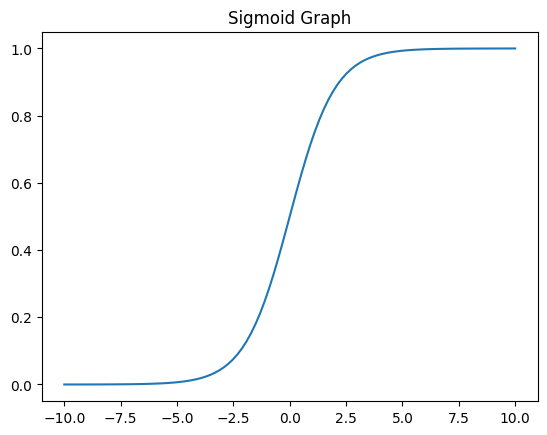

In [17]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.title("Sigmoid Graph")

In [23]:
def log_loss(y, y_hat):
    loss = -y*np.log(y_hat)-(1-y)*np.log((1-y_hat))
    return loss


log_loss(1, 0.001)

6.907755278982137

In [25]:
def log_loss(y, y_hat):
    loss = -y*np.log(y_hat)-(1-y)*np.log((1-y_hat))
    return loss


log_loss(1, 0.999)

0.0010005003335835344

In [30]:
log_loss(0, 0.99999)

11.51292546497478

In [33]:
log_loss(0, 0.001)

0.0010005003335835344

Supposedly your y = 0 and ŷ = 0.01(CP of Class 1) 99.0 belong to class 0, so what be the log-loss ?

Erorr: should be low


In [34]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]

In [38]:
churn["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [35]:
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
y.shape

(5700, 1)

In [ ]:
y

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2)
X_train.shape,X_test.shape

((4560, 5), (1140, 5))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train  =scaler.fit_transform(X_train)
X_test  =scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train,y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
y_pred=lgr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [47]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [49]:
y_test= y_test.reshape(len(y_test))

In [51]:
def acc(y_true, y_pred):
    return np.sum(y_true==y_pred)/len(y_true)
# test acuuracy
acc(y_test, y_pred)

0.7149122807017544

In [55]:
# train acuuracy

y_pred= lgr.predict(X_train)
y_train= y_train.reshape(len(y_train))

acc(y_train, y_pred)

0.7085526315789473